<a href="https://colab.research.google.com/github/SNCA-24/Van-Cab-Pickup-Simulation-using-A-algo/blob/main/Van_Pickup_Simulation_using_A_Algo_Academic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx # create an empty graph
G=nx.Graph()

In [ ]:
# create example graph for R2 with weights on edges, weight 1 means toll road to distinguish from non toll roads with weight 0
G.add_edges_from([(3, 9, {'weight': 2}),(1, 4, {'weight': 1}), (1, 9,{'weight': 1}), (4,9,{'weight': 1}), (9,2, {'weight': 1}), (9,7, {'weight': 1}), (2,7, {'weight': 1}),  (2,5, {'weight': 2}),  (7,5, {'weight': 1}),  (7,8,{'weight': 2}), (5,6, {'weight': 1}), (5,8, {'weight': 1}), (5,10, {'weight': 2}),(8,6, {'weight': 2}),(8,10, {'weight': 1})])

node degree
3 1
9 5
1 2
4 2
2 3
7 4
5 5
8 4
6 2
10 2

the adjacency list
3 9
9 1 4 2 7
1 4
4
2 7 5
7 5 8
5 6 8 10
8 6 10
6
10
{(3, 9): 2, (9, 1): 1, (9, 4): 1, (9, 2): 1, (9, 7): 1, (1, 4): 1, (2, 7): 1, (2, 5): 2, (7, 5): 1, (7, 8): 2, (5, 6): 1, (5, 8): 1, (5, 10): 2, (8, 6): 2, (8, 10): 1}


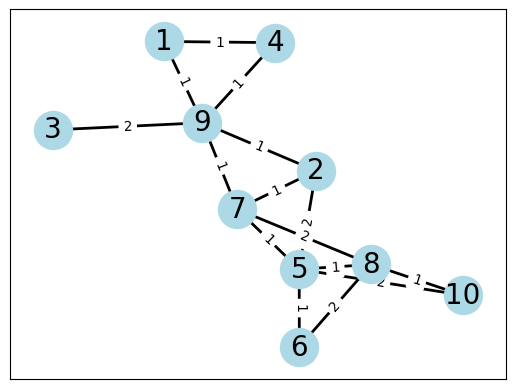

In [ ]:
import matplotlib.pyplot as plt # routine to plot the example graph

# some properties
print("node degree")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', linewidths=0.05) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=2)                               # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, 'weight','trips')
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [ ]:
import time
from datetime import datetime, timedelta

#main loop function to start simulating the cab services

def simulate_cab_service(start_time, end_time):
    current_time = start_time

    #loop runs for every minute from 8:00AM to 6:00pm i.e 600 times

    while current_time < end_time: # this is a new clock tick
        print(f"Current time: {current_time.strftime('%I:%M %p')}")

        #move all vans forward to synchronize their location to the current node


        #update_van_pos=move_van(van, current_time, R)   van is the id of the van to be updated, R is its routing queue
                          # which contains the node that the van needs to be in at the current clock tick
                          # note that when the road segment (edge) from the current location
                          # to the next location is along a congested node (edge weight=2)
                          # then the van does not advance to the next node until the next clock tick.

          #having updated the position of each van to refect the current clock tick
          # we should now remove customers who wanted to be dropped off at
          # the current location of each van

        #remove_customers(van,current_loc,R)

        # we can now assign new customers to vans, but first the van needs to be assigned
        # to each customer.

        #calling generating service requests function for generating customer requests

        #start_loc, end_loc=generate_service_requests(start_loc, end_loc) # start_loc is the customer pick up point
                                                              # whereas end_loc is the drop off poin

        # we are now in a position to assign customers to vans
        # 1: call assign_van for assigning a request to a van
        #van=assign_van(start_loc, end_loc) van is the id (1..30) of the van assigned to the request;
                                            # if assign_van returns 0 that indicates all vans are full

        #2: once a van has been assigned, the customer needs to be assigned to that van

        #insert_customers(van,s) s is the service queue for that van

        # Move time forward by one clock tick (i.e., one minute)
        current_time += timedelta(minutes=1) # Tip : adjust minutes to 60 for testing purposes so that loop runs only 10 times

    print("Simulation ended.")

In [ ]:
nx.dijkstra_path(G,2,1)  #  Find the length of the shortest path using Dijsktra's algorithm

[2, 9, 1]

In [ ]:
nx.astar_path(G,2,1) # Find the length of the shortest path using the A* algorithm.

[2, 9, 1]

In [ ]:
import networkx as nx     # generic graph for R3 onwards
#seed=1000                # seed the graph for reproducibility, you should be doing this once you generate a connected graph
#G= nx.gnp_random_graph (60, .06, seed=seed) # uncomment this and the above line once you have a connected graph.
G= nx.gnp_random_graph (100, .06)       # here we create a random binomial graph with 100 nodes and an average (expected) connectivity of 100*.06= 6.

In [ ]:
nx.is_connected(G)      # check whether G which has at least one path between each pair of nodes.

True

In [ ]:
# randomly allocate congested roads into the network through a binomial process
# with a probability of 0.3; congested roads are assigned a weight of 2 while
# non congested roads have a weight of 1
import random
glist=[]
for u,v in G.edges:
  glist.append((u,v))
random.shuffle(glist)
weight=1
count=0
for u, v in glist:
  if(count<len(G.edges)*0.3):
    G.add_edge(u, v, weight=2)
  else:
    G.add_edge(u, v, weight=1)
  count+=1
edge_labels = nx.get_edge_attributes(G, 'weight')

----- R2 -----

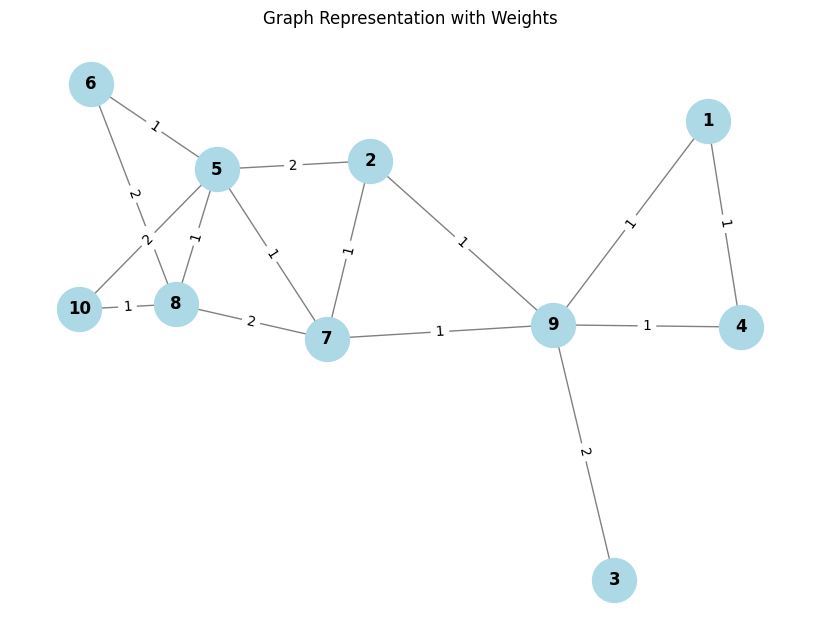

Clock Tick 1
Assigned Van 1 to Customer c1(Pickup: 1, Dropoff: 9)
Assigned Van 1 to Customer c2(Pickup: 2, Dropoff: 6)
P1={1, 9};
P2={1};
S1={(2,6)}
S2={}


Clock Tick 2
Assigned Van 1 to Customer c1(Pickup: 5, Dropoff: 7)
Assigned Van 1 to Customer c2(Pickup: 3, Dropoff: 4)
P1={1, 9, 7};
P2={1};
S1={(2,6), (5,7), (3,4)}
S2={}


Clock Tick 3
Assigned Van 2 to Customer c1(Pickup: 4, Dropoff: 7)
Assigned Van 1 to Customer c2(Pickup: 2, Dropoff: 10)
P1={1, 9, 7, 5};
P2={1, 9};
S1={(2,6), (5,7), (3,4), (2,10)}
S2={(4,7)}


Clock Tick 4
P1={1, 9, 7, 5, 6};
P2={1, 9, 7};
S1={(5,7), (3,4), (2,10)}
S2={}


Clock Tick 5
P1={1, 9, 7, 5, 6, 5};
P2={1, 9, 7};
S1={(5,7), (3,4), (2,10)}
S2={}


Clock Tick 6
P1={1, 9, 7, 5, 6, 5, 7};
P2={1, 9, 7};
S1={(3,4), (2,10)}
S2={}


Clock Tick 7
P1={1, 9, 7, 5, 6, 5, 7, 2};
P2={1, 9, 7};
S1={(3,4), (2,10)}
S2={}


Clock Tick 8
P1={1, 9, 7, 5, 6, 5, 7, 2, 9};
P2={1, 9, 7};
S1={(3,4), (2,10)}
S2={}


Clock Tick 9
P1={1, 9, 7, 5, 6, 5, 7, 2, 9, 4};
P2={1, 9, 7};

In [ ]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

# Define the graph structure with weights representing congested roads
graph = {
    1: {4: 1, 9: 1},
    2: {9: 1, 7: 1, 5: 2},
    3: {9: 2},
    4: {1: 1, 9: 1},
    5: {2: 2, 7: 1, 6: 1, 8: 1, 10: 2},
    6: {5: 1, 8: 2},
    7: {2: 1, 5: 1, 9: 2, 8: 2},
    8: {5: 1, 6: 2, 7: 2, 10: 1},
    9: {1: 1, 2: 1, 3: 2, 4: 1, 7: 1},
    10: {5: 2, 8: 1}
}

# Create a graph using networkx
G = nx.Graph()

# Add edges with weights to the graph
for node, edges in graph.items():
    for neighbor, weight in edges.items():
        G.add_edge(node, neighbor, weight=weight)

# Van object
class Van:
    def __init__(self, id, location):
        self.id = id
        self.location = location
        self.service_queue = []
        self.passenger_count = 0
        self.path = [location]  # Start with initial location

# A* search to find the shortest path between two nodes
def astar_path(start, goal, graph):
    frontier = [(0, start, [])]
    heapq.heapify(frontier)
    visited = set()

    while frontier:
        (cost, current_node, path) = heapq.heappop(frontier)

        if current_node in visited:
            continue

        path = path + [current_node]
        if current_node == goal:
            return path, cost

        visited.add(current_node)

        for neighbor, weight in graph[current_node].items():
            travel_time = weight * 2 if weight == 2 else weight
            heapq.heappush(frontier, (cost + travel_time, neighbor, path))

    return None, float('inf')

# Customer request
class Customer:
    def __init__(self, pickup, dropoff):
        self.pickup = pickup
        self.dropoff = dropoff

# Function to assign a van to a customer
def assign_van_to_customer(customer, vans, graph):
    # If both vans are at the same location, prioritize van 1
    if vans[0].location == vans[1].location:
        if vans[0].passenger_count < 5:  # Van 1 has space
            best_van = vans[0]
        elif vans[1].passenger_count < 5:  # Van 2 has space
            best_van = vans[1]
        else:
            return None  # Both vans are full
    else:
        # If vans are at different locations, use nearest van
        best_van = None
        shortest_path = float('inf')

        for van in vans:
            if van.passenger_count < 5:  # Only consider vans with space
                path, dist = astar_path(van.location, customer.pickup, graph)
                if dist < shortest_path:
                    shortest_path = dist
                    best_van = van

    # Assign the customer to the best van found
    if best_van:
        best_van.service_queue.append(customer)
        best_van.passenger_count += 1
        return best_van
    return None

# Update van position and handle delivery, considering the FIFO rule and no deviation
def update_van_position(van, graph):
    if van.service_queue:
        # The first customer in the queue is always prioritized for drop-off (FIFO rule)
        current_customer = van.service_queue[0]

        # Move towards the dropoff location of the first customer
        path, _ = astar_path(van.location, current_customer.dropoff, graph)
        if path and len(path) > 1:
            next_node = path[1]  # Move to next node
            van.location = next_node
            van.path.append(van.location)
        # If the van reaches the drop-off location
        if van.location == current_customer.dropoff:
            van.service_queue.pop(0)
            van.passenger_count -= 1

# Handle queue exceptions and pick-up on the way without deviation
def handle_queue_exceptions(van, graph):
    if van.service_queue:
        current_customer = van.service_queue[0]
        path_to_dropoff = astar_path(van.location, current_customer.dropoff, graph)[0]

        for customer in van.service_queue[1:]:
            path_to_pickup = astar_path(van.location, customer.pickup, graph)[0]
            if path_to_pickup and set(path_to_pickup).issubset(path_to_dropoff):
                if customer not in van.service_queue and van.passenger_count < 5:  # Check for space
                    van.service_queue.append(customer)
                    van.passenger_count += 1
                    van.path.append(customer.pickup)

        if not van.service_queue and van.path and van.path[-1] == current_customer.dropoff:
            van.path = [van.location]

# Display the graph using matplotlib
def display_graph(graph):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Set layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=12, font_weight='bold', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Graph Representation with Weights")
    plt.show()

# Simulation loop with commas in paths and queues
def simulation(v1, v2, c, graph, max_ticks):
    for t in range(max_ticks):
        print(f"Clock Tick {t + 1}")
        # Handle new requests and assign vans
        if t < len(c):
            for idx, customer in enumerate(c[t], start=1):
                assigned_van = assign_van_to_customer(customer, [v1, v2], graph)
                if assigned_van:
                    print(f"Assigned Van {assigned_van.id} to Customer c{idx}(Pickup: {customer.pickup}, Dropoff: {customer.dropoff})")
                else:
                    print(f"Customer c{idx}(Pickup: {customer.pickup}, Dropoff: {customer.dropoff}) could not be assigned.")

        # Update van positions
        for van in [v1, v2]:
            if van.service_queue:
                update_van_position(van, graph)

        # Display paths and service queues with commas between values
        print(f"P{v1.id}={{{', '.join(map(str, v1.path))}}};")
        print(f"P{v2.id}={{{', '.join(map(str, v2.path))}}};")
        s1_queue = ', '.join([f"({c.pickup},{c.dropoff})" for c in v1.service_queue])
        s2_queue = ', '.join([f"({c.pickup},{c.dropoff})" for c in v2.service_queue])
        print(f"S{v1.id}={{{s1_queue}}}")
        print(f"S{v2.id}={{{s2_queue}}}")
        print("\n")

# Initialize and run the simulation with the graph display
v1 = Van(1, 1)
v2 = Van(2, 1)
c = [
    [Customer(1, 9), Customer(2, 6)],  # Requests at tick 1
    [Customer(5, 7), Customer(3, 4)],  # Requests at tick 2
    [Customer(4, 7), Customer(2, 10)],  # Requests at tick 3
    [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
]
max_ticks = 19

# Display the graph
display_graph(G)

# Run the simulation
simulation(v1, v2, c, graph, max_ticks)

R3, R4 & R5

simulation results for R3 with 30 vehicles and average connectivity of 6
Fleet size: 30
Total Trips: 1918
Average wait time per customer: 3.51 minutes
Average service time per customer: 1.32 minutes
Average number of trips per van: 63.93


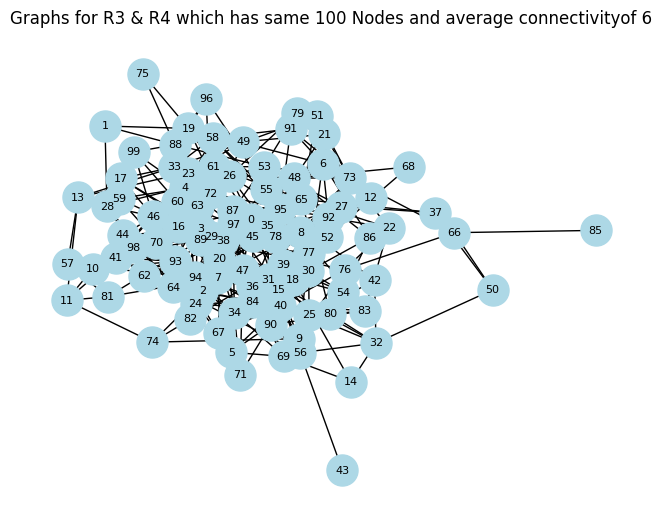

simulation results for R4 with 60 vehicles and average connectivity 6
Fleet size: 60
Total Trips: 3796
Average wait time per customer: 5.26 minutes
Average service time per customer: 2.41 minutes
Average number of trips per van: 63.27
simulation results for R5 with 60 vehicles, avgerage connectivity 3
Fleet size: 60
Total Trips: 3783
Average wait time per customer: 5.89 minutes
Average service time per customer: 3.94 minutes
Average number of trips per van: 63.05


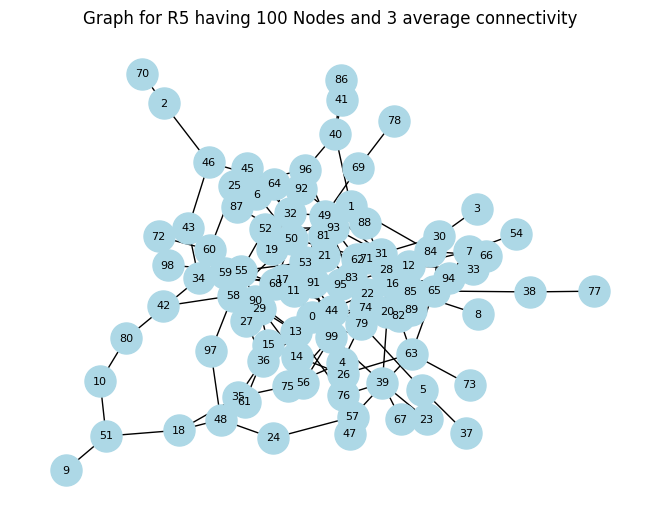

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# function to create a connected graph
def create_graph(num_nodes=100, avg_degree=6):
    while True:
        # create a random graph
        G = nx.gnm_random_graph(num_nodes, num_nodes * avg_degree // 2)
        if nx.is_connected(G):  # making sure the graph is fully connected
            break
    # assign random weights (1 or 2) to each edge
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = random.choice([1, 2])
    return G

# heuristic function that returns the shortest distance between two nodes
def dijkstra_heuristic(graph, node, goal):
    try:
        # Use Dijkstra to get the shortest path length
        return nx.dijkstra_path_length(graph, node, goal, weight='weight')
    except nx.NetworkXNoPath:
        return float('inf')  # Return infinity if there's no path

# A* algorithm to find the best path between two points
def astar_shortest_path(graph, start, end):
    return nx.astar_path(graph, start, end, heuristic=lambda u, v: dijkstra_heuristic(graph, u, v), weight='weight')

# representing a van
class Van:
    def __init__(self, van_id, location):
        self.id = van_id
        self.location = location
        self.service_queue = []  # list of assigned customers to the van
        self.passenger_count = 0  # number of passengers currently in the van
        self.path = []  # stores the path the van has taken
        self.waiting_time = 0  # time spent waiting for customer assignment (idle time without customers)
        self.service_time = 0  # total time spent servicing
        self.trips = 0  # Number of completed trips

# representing a customer request
class Customer:
    def __init__(self, pickup_time, pickup_location, dropoff_location):
        self.pickup_time = pickup_time
        self.pickup = pickup_location
        self.dropoff = dropoff_location
        self.assigned = False  # whether a van has been assigned or not
        self.wait_time = 0  # time the customer waited for the van
        self.service_time = 0  # time taken to complete the service

# van assignemnt customer
def assign_van(customer, vans, graph, current_time):
    # get vans that aren't full
    available_vans = [van for van in vans if van.passenger_count < 5]

    if not available_vans:
        return None  # No vans available

    best_van = None
    earliest_arrival = float('inf')

    for van in available_vans:
        try:
            # Calculate the path from the van's location to the customer's pickup point
            path = astar_shortest_path(graph, van.location, customer.pickup)
            travel_time = sum([graph.edges[path[x], path[x+1]]['weight'] for x in range(len(path)-1)])
            arrival_time = current_time + travel_time
            # Choose the van that can arrive the earliest
            if arrival_time < earliest_arrival:
                earliest_arrival = arrival_time
                best_van = van
        except nx.NetworkXNoPath:
            continue  # Skip if no path is found

    if best_van:
        # Assign customer to the selected van
        best_van.service_queue.append(customer)
        best_van.passenger_count = best_van.passenger_count + 1
        customer.assigned = True
        customer.wait_time = earliest_arrival - customer.pickup_time
        best_van.waiting_time += customer.wait_time
        return best_van
    return None

# van position update
def update_van_position(van, graph):
    if van.service_queue:
        customer = van.service_queue[0]  # Get the customer at the front of the queue
        try:
            # Find the best path from the van's current location to the customer's dropoff point
            path = astar_shortest_path(graph, van.location, customer.dropoff)
            van.location = customer.dropoff  # Update the van's location to the dropoff point
            van.path.extend(path)
            travel_time = sum([graph.edges[path[x], path[x+1]]['weight'] for x in range(len(path)-1)])
            van.service_time += travel_time
            van.trips = van.trips + 1  # Count this as a completed trip
            van.service_queue.pop(0)  # Remove the customer from the queue
            van.passenger_count -= 1  # Decrease the passenger count
        except nx.NetworkXNoPath:
            pass  # Ignore if no path is found

# random customer requests
def generate_customers(graph, total_hours=10):
    requests_per_hour = random.randint(450, 600)  # Random number of requests per hour
    total_requests = requests_per_hour * total_hours
    customer_requests = []

    for _ in range(total_requests):
        pickup_time = random.uniform(8 * 60, 18 * 60)  # Random time between 8 am and 6 pm
        pickup = random.choice(list(graph.nodes()))  # Random pickup location
        dropoff = random.choice(list(graph.nodes()))  # Random dropoff location
        while dropoff == pickup:  # Ensure the dropoff is different from the pickup location
            dropoff = random.choice(list(graph.nodes()))
        customer_requests.append(Customer(pickup_time, pickup, dropoff))

    # sorting the requests by pickup time
    customer_requests.sort(key=lambda x: x.pickup_time)
    return customer_requests

# simulation with a fleet of vans
def run_simulation(graph, total_vans=30):
    # Create a fleet of vans, each starting at a random location
    vans = [Van(van_id=i+1, location=random.choice(list(graph.nodes()))) for i in range(total_vans)]
    customers = generate_customers(graph)
    current_time = 8 * 60  # Start time: 8 am
    end_time = 24 * 60  # End time: midnight
    time_step = 10  # Simulation runs in 10-minute intervals for faster processing or better performance

    index = 0
    total_customers = len(customers)

    while current_time <= end_time or any(van.service_queue for van in vans):
        # Assign available customers to vans at the current time
        while index < total_customers and customers[index].pickup_time <= current_time:
            customer = customers[index]
            assign_van(customer, vans, graph, current_time)
            index = index + 1

        # Update the position of each van
        for van in vans:
            update_van_position(van, graph)

        current_time = current_time + time_step

    # Calculate the metrics
    total_waiting_time = sum(van.waiting_time for van in vans)
    total_service_time = sum(van.service_time for van in vans)
    total_trips = sum(van.trips for van in vans)
    avg_wait_time = total_waiting_time / total_customers
    avg_service_time = total_service_time / total_customers
    avg_trips_per_van = total_trips / total_vans

    print(f"Fleet size: {total_vans}")
    print(f"Total Trips: {total_trips}")
    print(f"Average wait time per customer: {avg_wait_time:.2f} minutes")
    print(f"Average service time per customer: {avg_service_time:.2f} minutes")
    print(f"Average number of trips per van: {avg_trips_per_van:.2f}")
# Running the code for different simulation scenarios
if __name__ == "__main__":

    # Scenario R3 with 30 vans and average connectivity of 6
    print("simulation results for R3 with 30 vehicles and average connectivity of 6")
    g = create_graph()
    run_simulation(g)

    # Display the graph used in the R3 & R4 scenario
    nx.draw(g, with_labels=True, node_color="lightblue", node_size=500, font_size=8)
    plt.title("Graphs for R3 & R4 which has same 100 Nodes and average connectivityof 6")
    plt.show()


    # Scenario R4 with 60 vans and average connectivity of 6
    print("simulation results for R4 with 60 vehicles and average connectivity 6")
    run_simulation(g, total_vans=60)

    # Scenario R5 with 60 vans but average connectivity 3)
    print("simulation results for R5 with 60 vehicles, avgerage connectivity 3")
    graph_low_connectivity = create_graph(avg_degree=3)
    run_simulation(graph_low_connectivity, total_vans=60)


    # display the graph used in the R5 scenario
    nx.draw(graph_low_connectivity, with_labels=True, node_color="lightblue", node_size=500, font_size=8)
    plt.title("Graph for R5 having 100 Nodes and 3 average connectivity")
    plt.show()